In [1]:
%load_ext autoreload
%autoreload 2
#%matplotlib notebook
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#import sys
#sys.path.append("../") if "../" not in sys.path else None # avoid adding multiple relave paths to sys.path

# custom packages
from ratsimulator import Agent, trajectory_generator
from ratsimulator.Environment import Rectangle

# Initialise Environment

In [3]:
# Environment params
boxsize = (2.2, 2.2)
origo = (0,0)
soft_boundary = 0.2

# Init Environment
env = Rectangle(boxsize=boxsize, soft_boundary=soft_boundary)

# add extra walls
env.add_wall(name="free_wall1", bias=np.array([0.4,0.4]),slope=np.array([0.8,0.8]),t=[0,1])
env.add_wall(name="free_wall2", bias=np.array([0.4,1.5]),slope=np.array([0.8,0]),t=[0,1])

Singular matrix
Singular matrix
Singular matrix
Singular matrix


In [6]:
# create track
seq_len=2000
gen = trajectory_generator(env,seq_len=seq_len)
outputs = next(gen)
positions,agent = outputs[0], outputs[-1]

TypeError: __init__() got multiple values for argument 'p0'

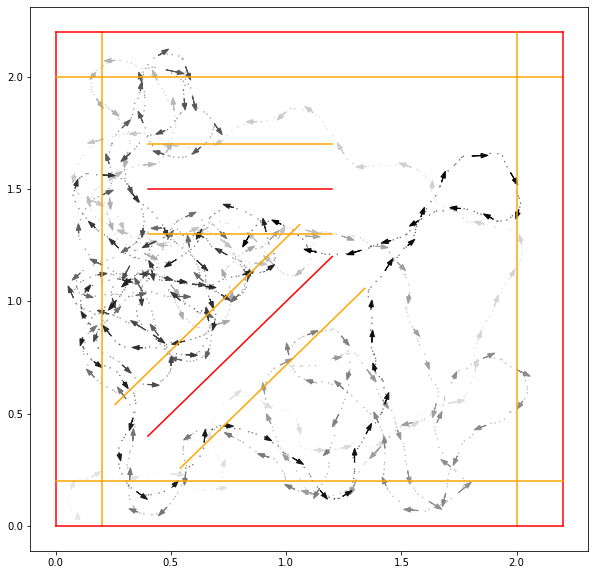

In [5]:
# plot track
fig,axs=plt.subplots(figsize=(10,10))
env.plot_board(axs)
agent.plot_trajectory(axs,ds=8)